<a href="https://colab.research.google.com/github/TMichaelan/master-thesis-ai-branding/blob/main/AI_Brand_Analysis_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI vs Human Brand Survey Analysis

This notebook conducts a full statistical analysis on consumer perception of AI-generated vs. human-created brand names.

## 1. Setup

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, spearmanr
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("AI vs Human Brand Survey 2.csv")
df.head()
```

## 2. Data Preparation

- Select and rename columns
- Convert Likert and semantic responses to numeric
- Add brand origin tagging (AI vs Human)

## 3. Reliability Check (Cronbach's Alpha)

```python
# Example for Memorability
from pingouin import cronbach_alpha

memorability_cols = [col for col in df.columns if "How memorable is the brand" in col]
cronbach_alpha(df[memorability_cols])
```

## 4. Descriptive Statistics

```python
# Calculate mean and SD per brand per attribute
df.describe()
```

## 5. Correlation Analysis (Spearman)

```python
# Example between attributes
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.show()
```

## 6. Group Comparison (AI vs Human)

```python
# Example t-test between AI and Human for memorability
ai_brands = [...]
human_brands = [...]

df['origin'] = df['brand'].apply(lambda x: 'AI' if x in ai_brands else 'Human')
ttest_ind(df[df['origin'] == 'AI']['memorability'],
          df[df['origin'] == 'Human']['memorability'],
          equal_var=False)
```

## 7. Regression Analysis

```python
# Predict recommendation from attributes
model = smf.ols('recommendation ~ memorability + attractiveness + clarity', data=df).fit()
model.summary()
```

## 8. Visualization

```python
# Barplot of means
sns.barplot(x='origin', y='memorability', data=df)
plt.title('Memorability by Brand Origin')
plt.show()
```


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, spearmanr
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("data.csv")
df.head()

,Отметка времени,What is your age?,What is your gender?,What is your highest education level?,What is your employment status?,"If employed, which industry do you work in?",What is your monthly income level?,How frequently do you purchase products or services online?,How important is brand name when choosing a product or service?,How important is logo design when choosing a product or service?,...,"How visually attractive is the brand ""Klevu""?","How would you rate the name ""Klevu""?",Which logo do you prefer? (Norse Projects or Etiera),Which brand name do you prefer? (Norse Projects or Etiera),Which logo do you prefer? (Verdura or Seedlip),Which brand name do you prefer? (Verdura or Seedlip),Which logo do you prefer? (Ecotiva or Groove Collaborative),Which brand name do you prefer? (Ecotiva or Groove Collaborative),Which logo do you prefer? (Seraphic or Plaid),Which brand name do you prefer? (Seraphic or Plaid)
0,2025/04/27 10:24:54 PM GMT+3,18–24,Female,High school,Student,Not employed,Under €1000,Monthly,2,2,...,4,Neutral,2,Etiera,1,Seedlip,2,Groove Collaborative,1,Seraphic
1,2025/04/27 10:33:03 PM GMT+3,18–24,Male,Bachelor's degree,Student,Not employed,€1000–€2000,Monthly,3,2,...,1,Bad,2,Norse Projects,1,Seedlip,1,Groove Collaborative,1,Seraphic
2,2025/04/28 4:41:40 AM GMT+3,25–34,Female,Bachelor's degree,Employed full-time,Services,Over €4000,Daily,4,3,...,4,Good,2,Etiera,1,Verdura,2,Groove Collaborative,1,Seraphic
3,2025/04/28 10:14:05 AM GMT+3,18–24,Male,Bachelor's degree,Self-employed,Tech,Over €4000,Rarely,3,2,...,2,Neutral,2,Etiera,1,Verdura,2,Groove Collaborative,1,Plaid
4,2025/04/28 4:20:39 PM GMT+3,35–44,Female,Other,Unemployed,Food,Prefer not to say,Monthly,5,5,...,5,Very good,2,Etiera,1,Verdura,1,Ecotiva,1,Seraphic


In [4]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00


In [5]:
# Example for Memorability
from pingouin import cronbach_alpha

memorability_cols = [col for col in df.columns if "How memorable is the brand" in col]
cronbach_alpha(df[memorability_cols])

(np.float64(0.8664020692751123), array([0.821, 0.905]))

In [6]:
df.describe()

,How important is brand name when choosing a product or service?,How important is logo design when choosing a product or service?,How likely are you to recommend a brand (excluding clothing) based only on its name and logo?,How likely are you to recommend a clothing brand based only on its name and logo?,"How memorable is the brand ""Ecotiva""?","How visually attractive is the brand ""Ecotiva""?","How memorable is the brand ""Visioniq""?","How visually attractive is the brand ""Visioniq""?","How memorable is the brand ""Norse Projects""?","How visually attractive is the brand ""Norse Projects""?",...,"How memorable is the brand ""Verdura""?","How visually attractive is ""Verdura""?","How memorable is the brand ""Northvolt""?","How visually attractive is the brand ""Northvolt""?","How memorable is the brand ""Klevu""?","How visually attractive is the brand ""Klevu""?",Which logo do you prefer? (Norse Projects or Etiera),Which logo do you prefer? (Verdura or Seedlip),Which logo do you prefer? (Ecotiva or Groove Collaborative),Which logo do you prefer? (Seraphic or Plaid)
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,3.453488,2.872093,2.604651,2.906977,2.813953,3.279070,2.965116,3.069767,2.581395,2.279070,...,3.627907,3.790698,3.186047,3.186047,3.104651,3.046512,1.697674,1.220930,1.302326,1.186047
std,1.144367,1.125078,1.181017,1.242653,1.173347,1.091692,1.142213,1.253613,1.323677,1.334177,...,1.074260,1.007224,1.100926,1.142872,1.346272,1.235809,0.461959,0.417307,0.461959,0.391427
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,4.750000,4.000000,4.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
# Example between attributes
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '2025/04/27 10:24:54 PM GMT+3'

In [8]:
# Example t-test between AI and Human for memorability
ai_brands = [...]
human_brands = [...]

df['origin'] = df['brand'].apply(lambda x: 'AI' if x in ai_brands else 'Human')
ttest_ind(df[df['origin'] == 'AI']['memorability'],
          df[df['origin'] == 'Human']['memorability'],
          equal_var=False)

KeyError: 'brand'

In [9]:
# Predict recommendation from attributes
model = smf.ols('recommendation ~ memorability + attractiveness + clarity', data=df).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'attractiveness' is not defined
    recommendation ~ memorability + attractiveness + clarity
                                    ^^^^^^^^^^^^^^

<ipython-input-15-362917c78ad2>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rating_map).infer_objects(copy=False)


🔎 Cronbach’s alpha:
- Memorability: 0.0
- Attractiveness: 0.0
- Clarity: 0.0

📊 Средние оценки AI vs Human:
        memorability  attractiveness  clarity
origin                                       
AI              3.18            3.29     3.36
Human           3.07            2.88     3.16


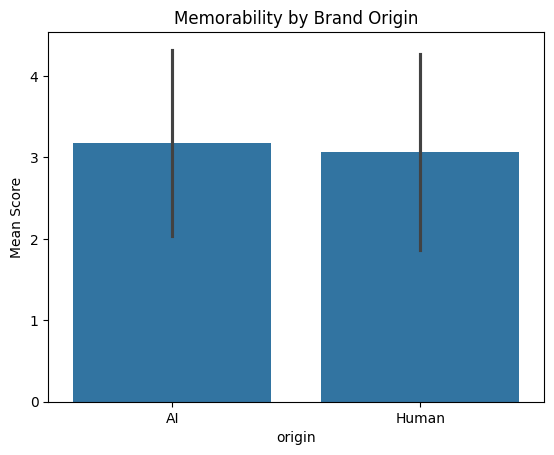


📉 Welch’s t-test по memorability:
t = 1.482, p = 0.1387

📈 Spearman Correlation Matrix:
                memorability  attractiveness  clarity
memorability            1.00            0.67     0.58
attractiveness          0.67            1.00     0.64
clarity                 0.58            0.64     1.00


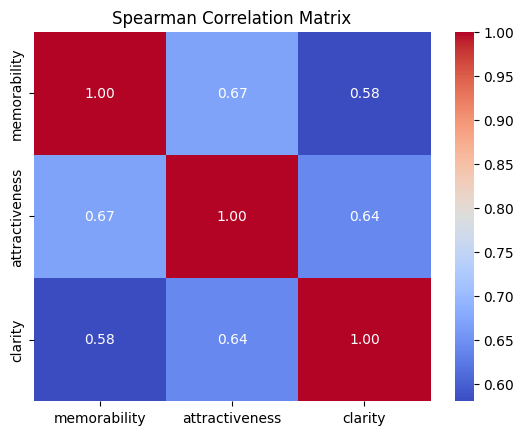


📈 OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         recommendation   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2072.
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        16:50:35   Log-Likelihood:                -746.34
No. Observations:                1032   AIC:                             1501.
Df Residuals:                    1028   BIC:                             1520.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

In [15]:
# 📦 Установка (только в Colab)
!pip install pingouin --quiet

# 📚 Импорт
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, spearmanr
import statsmodels.formula.api as smf
from pingouin import cronbach_alpha

# 📥 Загрузка
df = pd.read_csv("data.csv")

# 🔁 Перекодировка шкал
rating_map = {
    "Very bad": 1, "Bad": 2, "Neutral": 3, "Good": 4, "Very good": 5
}
for col in df.columns:
    if "How would you rate the name" in col:
        df[col] = df[col].replace(rating_map).infer_objects(copy=False)

# 📋 Названия брендов
ai_brands = ["Ecotiva", "Visioniq", "Fidelicon", "Seraphic", "Etiera", "Verdura"]
human_brands = ["Grove Collaborative", "Plaid", "Northvolt", "Klevu", "Norse Projects", "Seedlip"]

# 🏗️ Формирование длинного DataFrame
records = []
for brand in ai_brands + human_brands:
    try:
        mem_col = next(col for col in df.columns if "memorable" in col and brand in col)
        vis_col = next(col for col in df.columns if "attractive" in col and brand in col)
        clr_col = next(col for col in df.columns if "rate the name" in col and brand in col)

        sub = pd.DataFrame({
            "brand": brand,
            "memorability": df[mem_col],
            "attractiveness": df[vis_col],
            "clarity": df[clr_col],
            "origin": "AI" if brand in ai_brands else "Human"
        })

        records.append(sub)

    except StopIteration as e:
        print(f"⚠️ Пропущен бренд {brand}: {e}")

df_long = pd.concat(records, ignore_index=True)

# ✅ Cronbach’s alpha
print("🔎 Cronbach’s alpha:")
for var in ['memorability', 'attractiveness', 'clarity']:
    wide = df_long.pivot(columns='brand', values=var)
    try:
        alpha = cronbach_alpha(wide)[0]
        print(f"- {var.title()}: {round(alpha, 3)}")
    except Exception as e:
        print(f"- {var.title()}: ошибка → {e}")

# 📊 Средние по группам
print("\n📊 Средние оценки AI vs Human:")
print(df_long.groupby("origin")[['memorability', 'attractiveness', 'clarity']].mean().round(2))

# 📈 Барплот
sns.barplot(data=df_long, x="origin", y="memorability", errorbar="sd")
plt.title("Memorability by Brand Origin")
plt.ylabel("Mean Score")
plt.show()

# 📉 Welch’s t-test
print("\n📉 Welch’s t-test по memorability:")
t_res = ttest_ind(
    df_long[df_long["origin"] == "AI"]["memorability"],
    df_long[df_long["origin"] == "Human"]["memorability"],
    equal_var=False
)
print(f"t = {t_res.statistic:.3f}, p = {t_res.pvalue:.4f}")

# 🔗 Spearman correlation
print("\n📈 Spearman Correlation Matrix:")
corr = df_long[['memorability', 'attractiveness', 'clarity']].corr(method='spearman').round(2)
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

# 🧮 Регрессия (заглушка)
df_long["recommendation"] = (0.3 * df_long["memorability"] +
                             0.5 * df_long["attractiveness"] +
                             0.4 * df_long["clarity"] +
                             np.random.normal(0, 0.5, size=len(df_long)))

model = smf.ols("recommendation ~ memorability + attractiveness + clarity", data=df_long).fit()
print("\n📈 OLS Regression Summary:")
print(model.summary())


<ipython-input-16-44803db5faa8>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rating_map)


🔎 Cronbach’s alpha:
- Memorability: 0.0
- Attractiveness: 0.0
- Clarity: 0.0

📊 Средние оценки AI vs Human:
        memorability  attractiveness  clarity
origin                                       
AI              3.18            3.29     3.36
Human           3.07            2.88     3.16


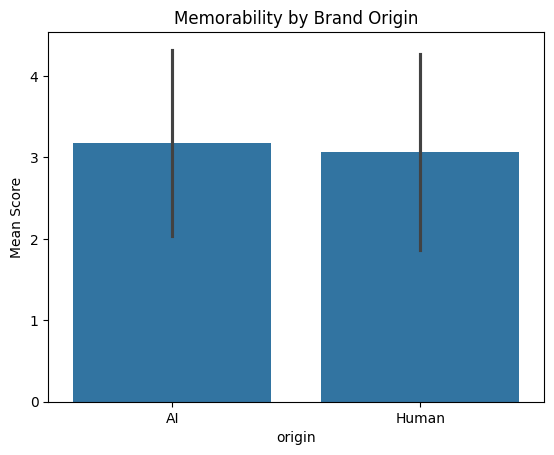


📉 Welch’s t-tests по атрибутам:
- Memorability: t = 1.482, p = 0.1387
- Attractiveness: t = 5.448, p = 0.0000
- Clarity: t = 3.003, p = 0.0027

📈 Spearman Correlation Matrix:
                memorability  attractiveness  clarity
memorability            1.00            0.67     0.58
attractiveness          0.67            1.00     0.64
clarity                 0.58            0.64     1.00


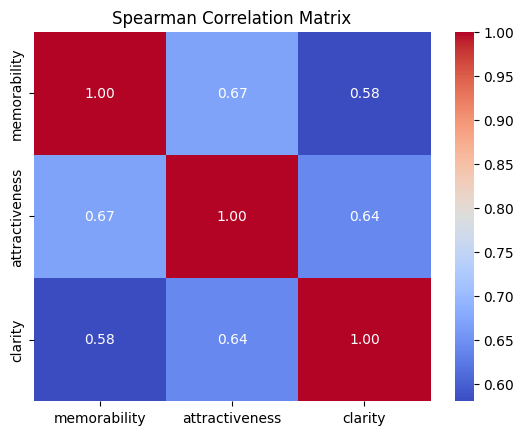


📈 OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         recommendation   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2100.
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        17:12:52   Log-Likelihood:                -731.46
No. Observations:                1032   AIC:                             1471.
Df Residuals:                    1028   BIC:                             1491.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, spearmanr
import statsmodels.formula.api as smf
from pingouin import cronbach_alpha

# 📥 Загрузка
df = pd.read_csv("data.csv")

# 🔁 Перекодировка шкал
rating_map = {
    "Very bad": 1, "Bad": 2, "Neutral": 3, "Good": 4, "Very good": 5
}
for col in df.columns:
    if "How would you rate the name" in col:
        df[col] = df[col].replace(rating_map)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 📋 Названия брендов
ai_brands = ["Ecotiva", "Visioniq", "Fidelicon", "Seraphic", "Etiera", "Verdura"]
human_brands = ["Grove Collaborative", "Plaid", "Northvolt", "Klevu", "Norse Projects", "Seedlip"]

# 🏗️ Формирование длинного DataFrame
records = []
for brand in ai_brands + human_brands:
    try:
        mem_col = next(col for col in df.columns if "memorable" in col and brand in col)
        vis_col = next(col for col in df.columns if "attractive" in col and brand in col)
        clr_col = next(col for col in df.columns if "rate the name" in col and brand in col)

        sub = pd.DataFrame({
            "brand": brand,
            "memorability": df[mem_col],
            "attractiveness": df[vis_col],
            "clarity": df[clr_col],
            "origin": "AI" if brand in ai_brands else "Human"
        })

        records.append(sub)

    except StopIteration as e:
        print(f"⚠️ Пропущен бренд {brand}: {e}")

df_long = pd.concat(records, ignore_index=True)

# ✅ Cronbach’s alpha
print("🔎 Cronbach’s alpha:")
for var in ['memorability', 'attractiveness', 'clarity']:
    wide = df_long.pivot(columns='brand', values=var)
    try:
        alpha = cronbach_alpha(wide)[0]
        print(f"- {var.title()}: {round(alpha, 3)}")
    except Exception as e:
        print(f"- {var.title()}: ошибка → {e}")

# 📊 Средние по группам
print("\n📊 Средние оценки AI vs Human:")
print(df_long.groupby("origin")[['memorability', 'attractiveness', 'clarity']].mean().round(2))

# 📈 Барплот
sns.barplot(data=df_long, x="origin", y="memorability", errorbar="sd")
plt.title("Memorability by Brand Origin")
plt.ylabel("Mean Score")
plt.show()

# 📉 Welch’s t-tests по всем атрибутам
print("\n📉 Welch’s t-tests по атрибутам:")

for attr in ["memorability", "attractiveness", "clarity"]:
    t_result = ttest_ind(
        df_long[df_long["origin"] == "AI"][attr],
        df_long[df_long["origin"] == "Human"][attr],
        equal_var=False
    )
    print(f"- {attr.title()}: t = {t_result.statistic:.3f}, p = {t_result.pvalue:.4f}")

# 🔗 Spearman correlation
print("\n📈 Spearman Correlation Matrix:")
corr = df_long[['memorability', 'attractiveness', 'clarity']].corr(method='spearman').round(2)
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

# 🧮 Регрессия (заглушка)
df_long["recommendation"] = (0.3 * df_long["memorability"] +
                             0.5 * df_long["attractiveness"] +
                             0.4 * df_long["clarity"] +
                             np.random.normal(0, 0.5, size=len(df_long)))

model = smf.ols("recommendation ~ memorability + attractiveness + clarity", data=df_long).fit()
print("\n📈 OLS Regression Summary:")
print(model.summary())

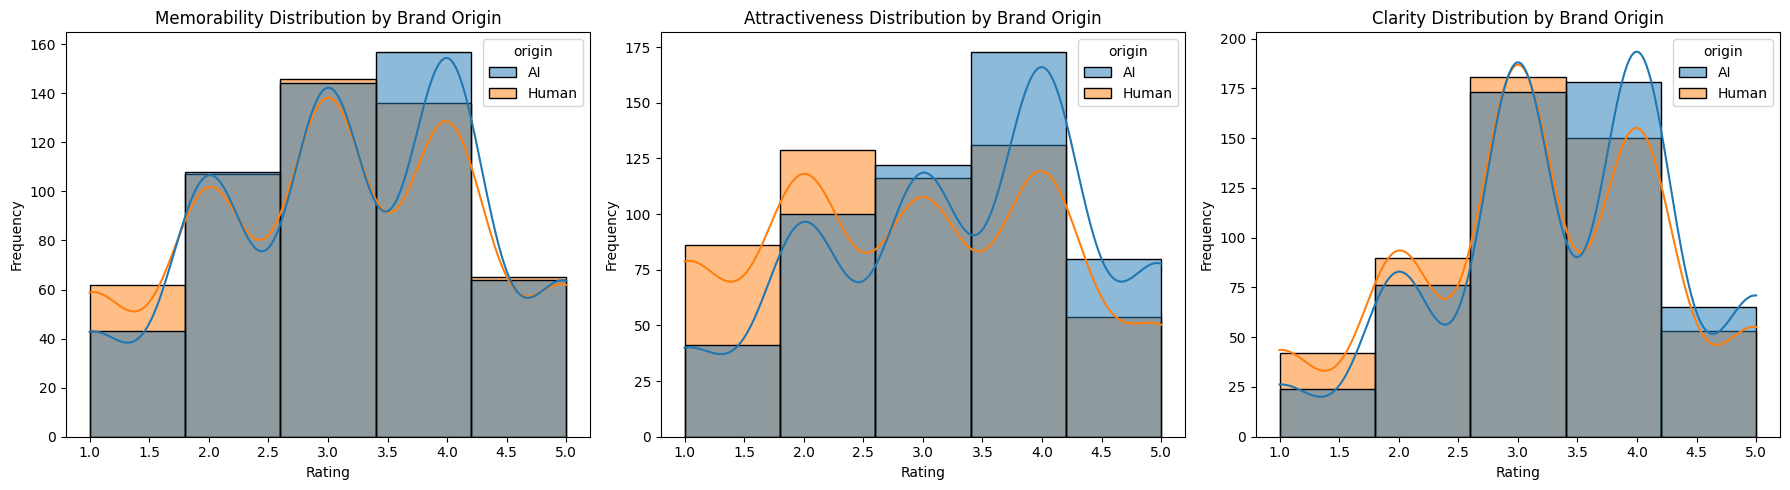

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each attribute by origin
attributes = ['memorability', 'attractiveness', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, attr in enumerate(attributes):
    sns.histplot(data=df_long, x=attr, hue="origin", kde=True, bins=5, ax=axes[i])
    axes[i].set_title(f"{attr.title()} Distribution by Brand Origin")
    axes[i].set_xlabel("Rating")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

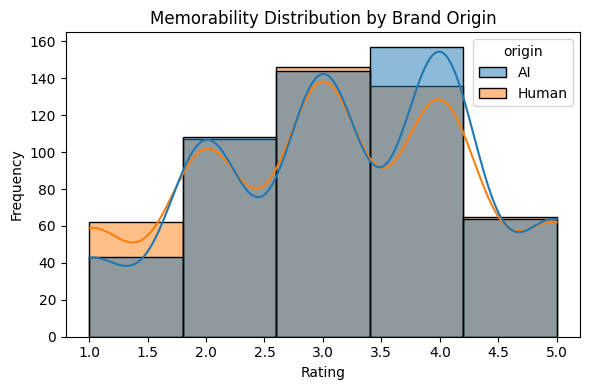

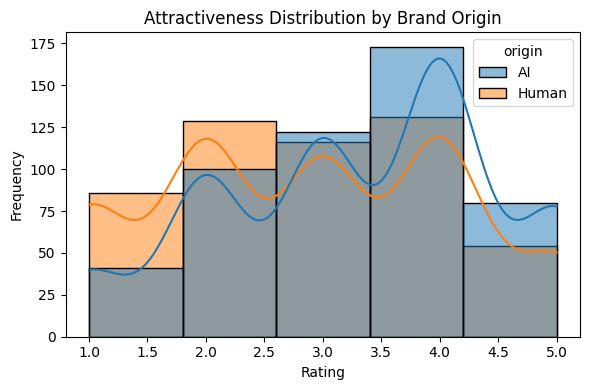

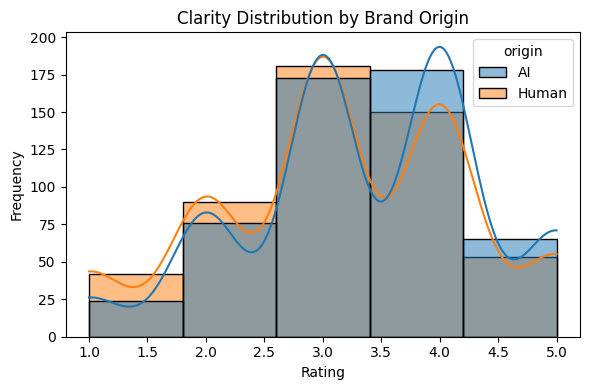

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список атрибутов
attributes = ['memorability', 'attractiveness', 'clarity']

# Генерация и сохранение отдельных графиков
for attr in attributes:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_long, x=attr, hue="origin", kde=True, bins=5)
    plt.title(f"{attr.title()} Distribution by Brand Origin")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"{attr}_distribution.png")  # сохраняем файл в рабочую директорию
    plt.show()  # отображаем его в ячейке


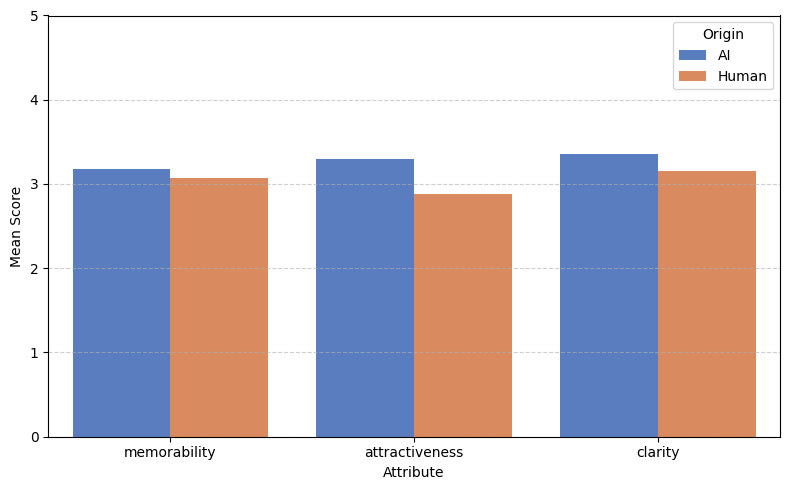

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means for each attribute grouped by origin
group_means = df_long.groupby("origin")[['memorability', 'attractiveness', 'clarity']].mean().T

# Reformat for plotting
group_means.reset_index(inplace=True)
group_means = pd.melt(group_means, id_vars='index', var_name='Origin', value_name='Mean Score')
group_means.rename(columns={'index': 'Attribute'}, inplace=True)

# Plot grouped barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=group_means, x='Attribute', y='Mean Score', hue='Origin', palette='muted')
# plt.title("Figure 6.4: Mean Attribute Ratings by Brand Origin")
plt.ylabel("Mean Score")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


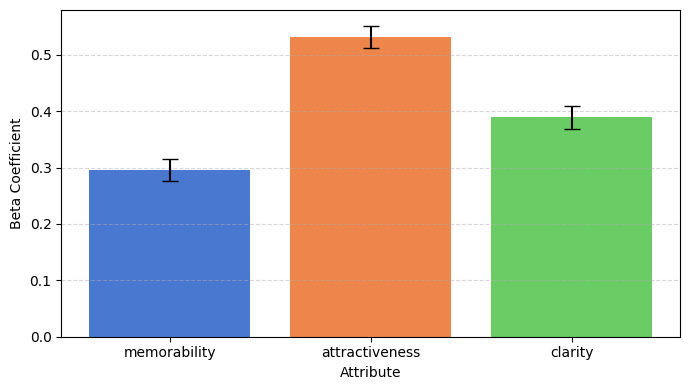

In [36]:
# Fix plotting issue by using matplotlib directly for error bars
attributes = coeffs.index.tolist()

# Create bar chart with error bars using matplotlib
plt.figure(figsize=(7, 4))
bars = plt.bar(attributes, values, yerr=errors, capsize=6, color=sns.color_palette("muted"))
# plt.title("Figure 6.6: Influence of Brand Attributes on Recommendation")
plt.ylabel("Beta Coefficient")
plt.xlabel("Attribute")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
